In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [292]:
# boards = np.load("data/fs_chkpt99_100_boards.npy")
boards = np.load("data/fs_chkpt99_100_boards_random.npy")
# boards = np.load("data/fs_chkpt99_50_boards.npy")
# boards = np.load("data/fs_chkpt99_50_boards_random.npy")
# boards = np.load("data/fs_chkpt99_10_boards.npy")

In [293]:
def axial_to_rectangular(q: int, r: int, w, h, scale=1):
    screen_center_x, screen_center_y = w / 2, h / 2
    return screen_center_x + scale * np.sqrt(3) * (q + 0.5 * r), \
        screen_center_y + scale * 1.5 * r

In [294]:
boards.shape

(82, 9, 9)

In [295]:
players = {
    i: np.sum((boards == i).astype(float), axis=0) for i in range(6)
}

(100, 9, 9)
(100, 9, 9)
(100, 9, 9)
(100, 9, 9)
(100, 9, 9)
(68, 9, 9)


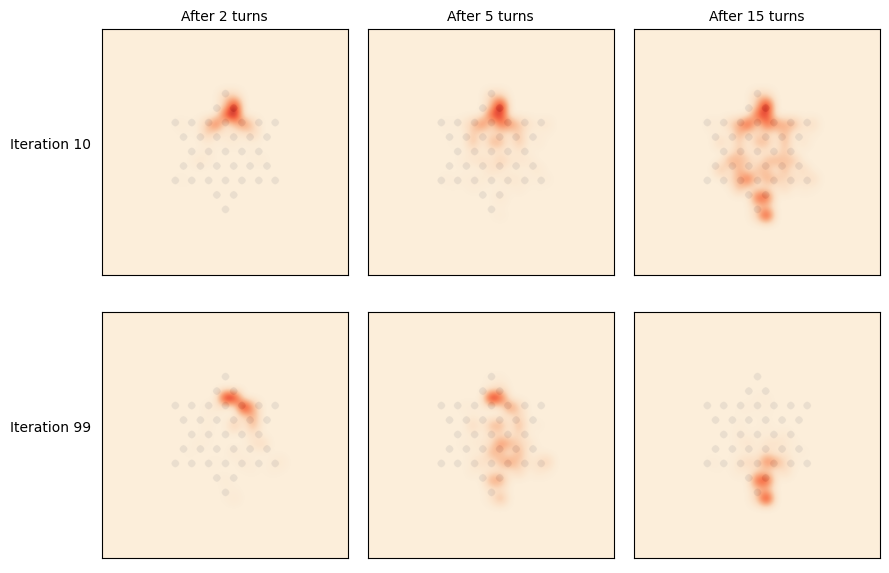

In [335]:
fig, ax = plt.subplots(2, 3, figsize=(9, 6))

for checkpoint_idx, checkpoint in enumerate([10, 99]):
    for plot_idx, n in enumerate([2, 5, 15]):
        boards = np.load(f"data/fs_chkpt{checkpoint}_move{n}_boards_random.npy")
        print(boards.shape)
        size = boards.shape[1] // 4 
        scale = 3
        h, w = boards.shape[1] * scale, boards.shape[2] * scale

        board_rects = {
            i: np.zeros((h, w)) for i in range(6)
        }
        players = {
            i: np.sum((boards == i).astype(float), axis=0) for i in range(6)
        }
        for i in range(6):
            for q in range(-2 * size, 2 * size + 1):
                for r in range(-2 * size, 2 * size + 1):
                    x, y = axial_to_rectangular(q, r, w, h)
                    if 0 <= round(x) < board_rect.shape[0] and 0 <= round(y) < board_rect.shape[1]:
                        low_x, high_x = np.floor(x).astype(int), np.ceil(x).astype(int)
                        low_y, high_y = np.floor(y).astype(int), np.ceil(y).astype(int)
                        diff_low_x, diff_high_x = x - low_x, high_x - x
                        diff_low_y, diff_high_y = y - low_y, high_y - y
            
                        for a, diff_a in zip([low_x, high_x], [diff_low_x, diff_high_x]):
                            for b, diff_b in zip([low_y, high_y], [diff_low_y, diff_high_y]):
                                board_rects[i][b, a] += players[i][q, r] * diff_a * diff_b
                        board_rects[i][round(y), round(x)] += players[i][q, r]   
            board_rects[i] /= 100
            
        cmaps = ["Reds", "Greys", "Oranges", "Greens", "Blues", "Purples"]
        ax[checkpoint_idx, plot_idx].imshow(board_rects[0], interpolation="none", cmap=cmaps[i], alpha=1.0 * (board_rects[0]>0))
        ax[checkpoint_idx, plot_idx].imshow(frame)
        xmin, xmax = ax[checkpoint_idx, plot_idx].get_xlim()
        ymin, ymax = ax[checkpoint_idx, plot_idx].get_ylim()
        extent=(xmin,xmax,ymin,ymax)
        ax[checkpoint_idx, plot_idx].imshow(board_rects[0], cmap=cmaps[0], interpolation="bicubic", alpha=0.8, extent=(xmin,xmax,ymin,ymax))
        ax[checkpoint_idx, plot_idx].set_xticks([])
        ax[checkpoint_idx, plot_idx].set_yticks([])

for i, n in enumerate([2, 5, 15]):
    ax[0, i].set_title(f"After {n} turns", size="medium")
for i, checkpoint in enumerate([10, 99]):
    ax[i, 0].set_ylabel(f"Iteration {checkpoint}", rotation=0, ha="right", size="medium")
    
plt.tight_layout()
plt.savefig("plots/random_heatmap.png")

In [297]:
frame = np.load("data/frame.npy")

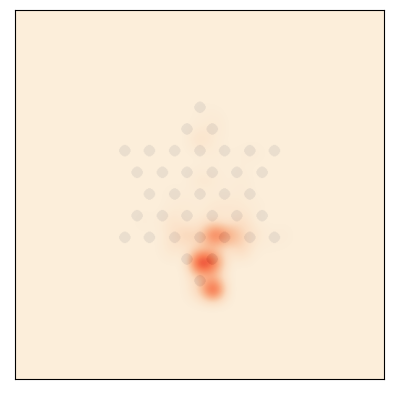

In [298]:
plt.figure()
plt.imshow(frame)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
extent=(xmin,xmax,ymin,ymax)
plt.imshow(board_rects[0], cmap=cmaps[0], interpolation="bicubic", alpha=0.8, extent=(xmin,xmax,ymin,ymax))
# plt.imshow(frame, alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show()